### **Assignment 1: Neural Networks**




# **Importing necessary libraries and modules for the IMDB dataset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers, optimizers, losses, metrics, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


* numpy is imported as np for numerical computations.
* matplotlib.pyplot is imported as plt for data visualization.
* From tensorflow.keras.datasets, the imdb dataset is imported, which will be
  used for this analysis.
* Various modules and classes from tensorflow.keras are imported, including models, layers, optimizers, losses, metrics, and regularizers.
* Specifically, Sequential model and Dense layer classes are imported from tensorflow.keras.models and tensorflow.keras.layers, respectively

# **Loading the IMDB dataset**

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## **Neural Network Model Builder with Regularization and Dropout**

In [ ]:
def build_model(num_hidden_layers=2, num_hidden_units=16, activation='relu', loss='binary_crossentropy', dropout_rate=0.5, regularization=None, regularization_rate=0.01):
    model = models.Sequential()
    model.add(layers.Dense(num_hidden_units, activation=activation, kernel_regularizer=regularizers.l2(regularization_rate), input_shape=(10000,)))
    for _ in range(num_hidden_layers - 1):
        model.add(layers.Dense(num_hidden_units, activation=activation, kernel_regularizer=regularizers.l2(regularization_rate)))
        model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss=loss,
                  metrics=['accuracy'])
    return model

* activation='relu'
* loss = 'binary_crossentropy'
* droput_rate = 0.5
* l2 Regularization


# **Model Training and Evaluation Function**

In [ ]:
def train_and_evaluate_model(model, x_train, y_train, x_val, y_val, epochs=20, batch_size=512):
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=0)
    return history

# **Model Configuration Settings**

In [ ]:
configurations = [
    {'num_hidden_layers': 1, 'num_hidden_units': 16},
    {'num_hidden_layers': 3, 'num_hidden_units': 16},
    {'num_hidden_layers': 1, 'num_hidden_units': 32},
    {'num_hidden_layers': 3, 'num_hidden_units': 32},
    {'num_hidden_layers': 1, 'num_hidden_units': 64},
    {'num_hidden_layers': 3, 'num_hidden_units': 64},
]

In [ ]:
results = []

# **Model Training and Evaluation**

In [ ]:
for config in configurations:
    model = build_model(num_hidden_layers=config['num_hidden_layers'], num_hidden_units=config['num_hidden_units'])
    history = train_and_evaluate_model(model, partial_x_train, partial_y_train, x_val, y_val)
    loss, accuracy = model.evaluate(x_test, y_test)
    results.append({'config': config, 'history': history, 'test_loss': loss, 'test_accuracy': accuracy})

782/782 [==============================] - 3s 4ms/step - loss: 0.4424 - accuracy: 0.8709


* The provided code iterates over each configuration defined in the configurations list.
* For each configuration, it builds a neural network model using the build_model function with the specified number of hidden layers and units.
* The model is then trained and evaluated using the train_and_evaluate_model function, which takes training and validation data.
* After training and evaluating the model, the test loss and accuracy are computed using the test data.
* The results, including the configuration details, training history, test loss, and test accuracy, are appended to a list named results.

# **Results**

In [ ]:
model_configurations = []
model_test_loss = []
model_test_accuracy = []
for result in results:
    print(f"Configuration: {result['config']}")
    print(f"Test Loss: {result['test_loss']}, Test Accuracy: {result['test_accuracy']}")
    model_configurations.append(str(result['config']['num_hidden_layers'])+":"+str(result['config']['num_hidden_units']))
    model_test_loss.append(result['test_loss'])
    model_test_accuracy.append(result['test_accuracy'])


Configuration: {'num_hidden_layers': 1, 'num_hidden_units': 16}
Test Loss: 0.437851220369339, Test Accuracy: 0.8438400030136108
Configuration: {'num_hidden_layers': 3, 'num_hidden_units': 16}
Test Loss: 0.4585479199886322, Test Accuracy: 0.8706799745559692
Configuration: {'num_hidden_layers': 1, 'num_hidden_units': 32}
Test Loss: 0.4125725030899048, Test Accuracy: 0.865119993686676
Configuration: {'num_hidden_layers': 3, 'num_hidden_units': 32}
Test Loss: 0.4543474316596985, Test Accuracy: 0.8708000183105469
Configuration: {'num_hidden_layers': 1, 'num_hidden_units': 64}
Test Loss: 0.4034256637096405, Test Accuracy: 0.8734800219535828
Configuration: {'num_hidden_layers': 3, 'num_hidden_units': 64}
Test Loss: 0.44235163927078247, Test Accuracy: 0.8708800077438354


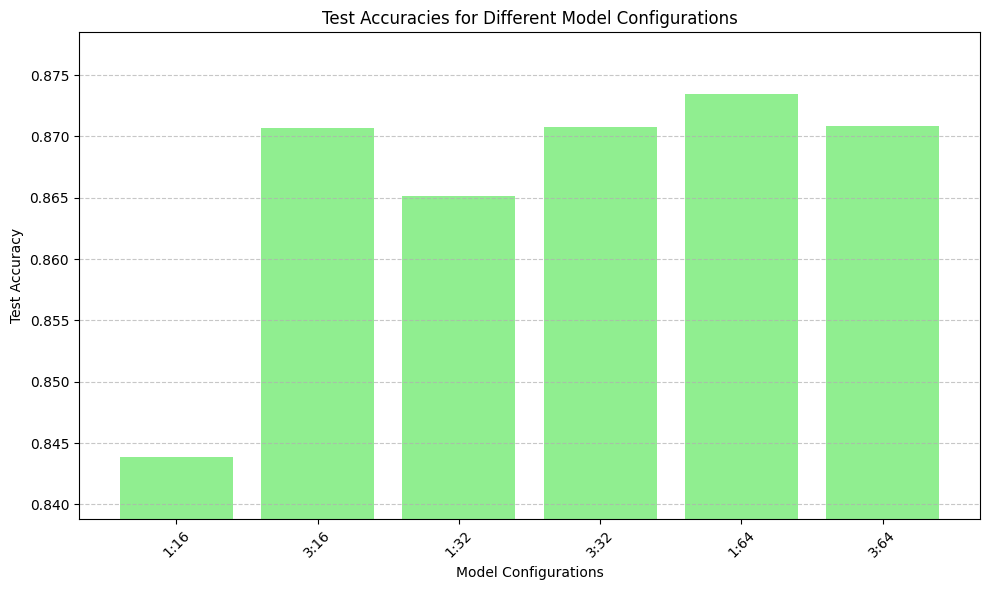

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(model_configurations, model_test_accuracy, color='lightgreen')
plt.title('Test Accuracies for Different Model Configurations')
plt.xlabel('Model Configurations')
plt.ylabel('Test Accuracy')
plt.ylim(min(model_test_accuracy)-0.005, max(model_test_accuracy)+0.005)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

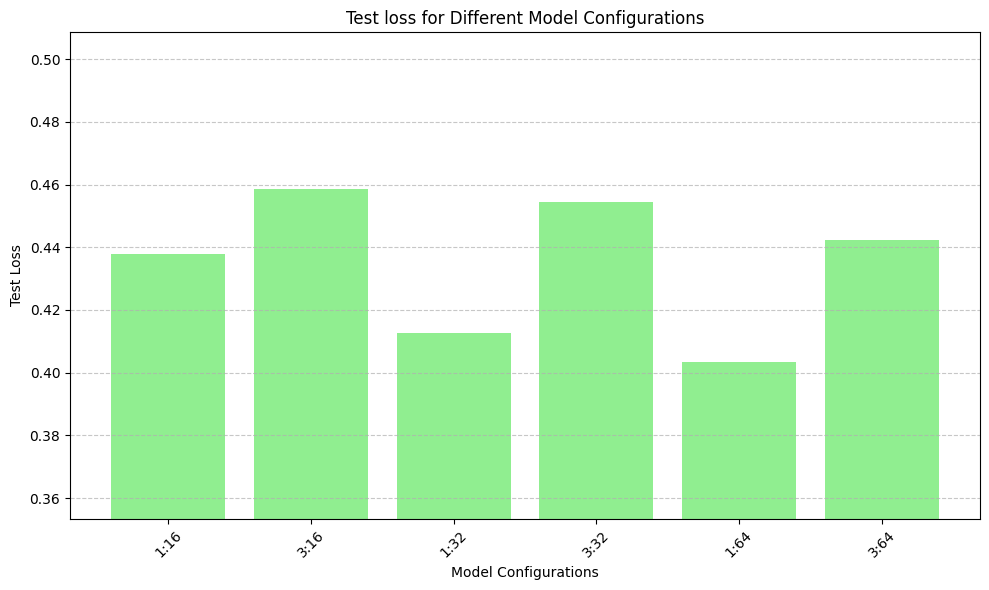

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(model_configurations, model_test_loss, color='lightgreen')
plt.title('Test loss for Different Model Configurations')
plt.xlabel('Model Configurations')
plt.ylabel('Test Loss')
plt.ylim(min(model_test_loss)-0.05, max(model_test_loss)+0.05)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **Neural Network Model Builder with Regularization and Dropout for tanh and mse**

In [ ]:
def act_build_model(num_hidden_layers=2, num_hidden_units=16, activation='tanh', loss='mse',dropout_rate=0.5, regularization=None, regularization_rate=0.01):
    model = models.Sequential()
    model.add(layers.Dense(num_hidden_units, activation=activation, kernel_regularizer=regularizers.l2(regularization_rate), input_shape=(10000,)))
    for _ in range(num_hidden_layers - 1):
        model.add(layers.Dense(num_hidden_units, activation=activation, kernel_regularizer=regularizers.l2(regularization_rate)))
        model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss=loss,
                  metrics=['accuracy'])
    return model

* activation='tanh'
* loss = 'mse'
* droput_rate = 0.5
* l2 Regularization

In [ ]:
act_results = []

# **Model Training and Evaluation**

In [ ]:
for config in configurations:
    model = act_build_model(num_hidden_layers=config['num_hidden_layers'], num_hidden_units=config['num_hidden_units'])
    history = train_and_evaluate_model(model, partial_x_train, partial_y_train, x_val, y_val)
    loss, accuracy = model.evaluate(x_test, y_test)
    act_results.append({'config': config, 'history': history, 'test_loss': loss, 'test_accuracy': accuracy})

782/782 [==============================] - 3s 4ms/step - loss: 0.1414 - accuracy: 0.8754


# **Results**

In [ ]:
act_model_configurations = []
act_model_test_loss = []
act_model_test_accuracy = []
for result in act_results:
    print(f"Configuration: {result['config']}")
    print(f"Test Loss: {result['test_loss']}, Test Accuracy: {result['test_accuracy']}")
    act_model_configurations.append(str(result['config']['num_hidden_layers'])+":"+str(result['config']['num_hidden_units']))
    act_model_test_loss.append(result['test_loss'])
    act_model_test_accuracy.append(result['test_accuracy'])

Configuration: {'num_hidden_layers': 1, 'num_hidden_units': 16}
Test Loss: 0.13196450471878052, Test Accuracy: 0.8682799935340881
Configuration: {'num_hidden_layers': 3, 'num_hidden_units': 16}
Test Loss: 0.1479194611310959, Test Accuracy: 0.8752800226211548
Configuration: {'num_hidden_layers': 1, 'num_hidden_units': 32}
Test Loss: 0.1519286036491394, Test Accuracy: 0.8345199823379517
Configuration: {'num_hidden_layers': 3, 'num_hidden_units': 32}
Test Loss: 0.1509721428155899, Test Accuracy: 0.8678399920463562
Configuration: {'num_hidden_layers': 1, 'num_hidden_units': 64}
Test Loss: 0.14104266464710236, Test Accuracy: 0.8573200106620789
Configuration: {'num_hidden_layers': 3, 'num_hidden_units': 64}
Test Loss: 0.1413896530866623, Test Accuracy: 0.8753600120544434


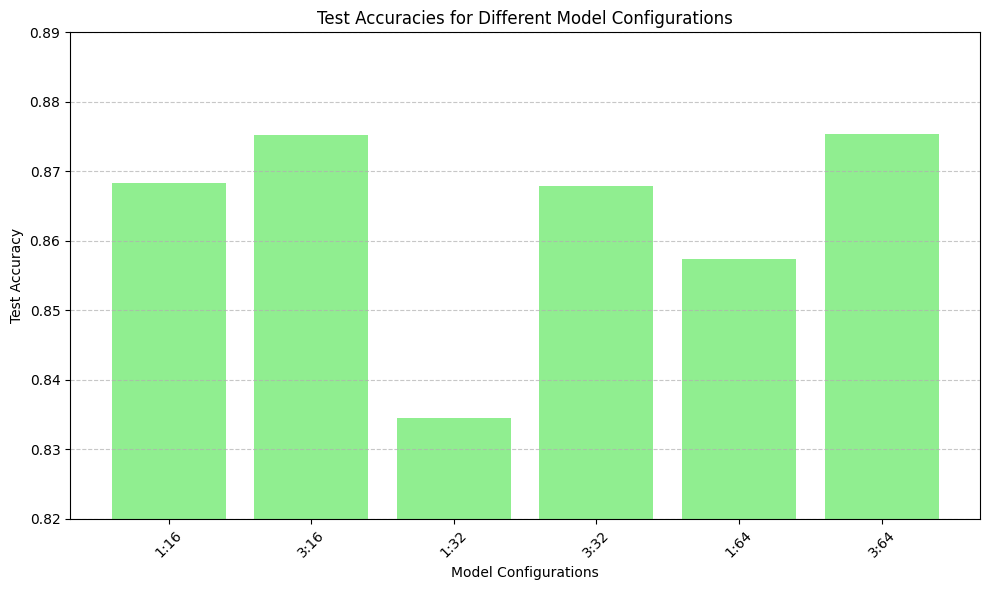

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(act_model_configurations, act_model_test_accuracy, color='lightgreen')
plt.title('Test Accuracies for Different Model Configurations')
plt.xlabel('Model Configurations')
plt.ylabel('Test Accuracy')
plt.ylim(0.82, 0.89)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

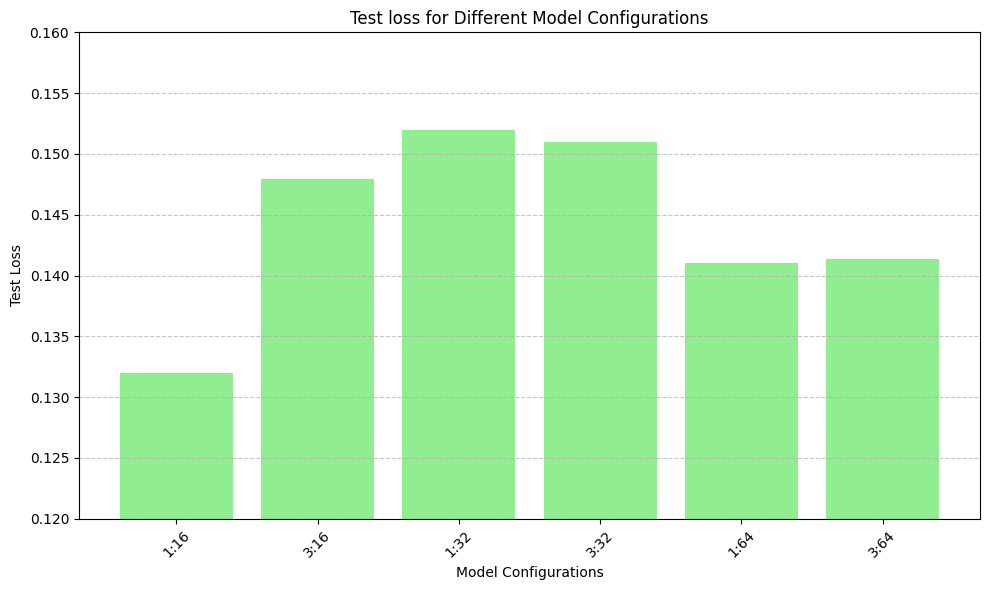

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(act_model_configurations, act_model_test_loss, color='lightgreen')
plt.title('Test loss for Different Model Configurations')
plt.xlabel('Model Configurations')
plt.ylabel('Test Loss')
plt.ylim(0.12, 0.16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* Model with Relu Activation and Binary Crossentropy Loss:
> Test Loss: Varies between approximately 0.403 and 0.458                                      
>Test Accuracy: Varies between approximately 0.843 and 0.874                                                                                      
* Model with Tanh Activation and MSE Loss:
> Test Loss: Varies between approximately 0.131 and 0.152                                  
> Test Accuracy: Varies between approximately 0.834 and 0.875

* Differences:
> Loss Function: The first model uses binary crossentropy loss, while the second model uses mean squared error (MSE) loss.
> Activation Function: The first model uses ReLU activation, while the second model uses hyperbolic tangent (tanh) activation.

* Comparison:
>  Test Loss: The model with tanh activation and MSE loss generally achieved lower test loss values compared to the model with ReLU activation and binary crossentropy loss. Lower test loss values indicate better agreement between the model's predictions and the actual labels in the test data.                                                                        
> Test Accuracy: The test accuracy varies for both models, but there is no consistent trend indicating one activation and loss combination is consistently better in terms of accuracy across all configurations.
* Conclusion:
> Overall, based on the test loss values, the model with tanh activation and MSE loss appears to perform slightly better than the model with ReLU activation and binary crossentropy loss